## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('priv_data_clean.csv')
df.head()

index Location        Country Aircraft.damage              Make     Model  \
0      0       ID  United States       Destroyed           Stinson     108-3   
1      1       CA  United States       Destroyed             Piper  Pa24-180   
2      2       VA  United States       Destroyed            Cessna      172M   
3      3       CA  United States       Destroyed          Rockwell       112   
4      4       MA  United States     Substantial  Mcdonnel Douglas       Dc9   

   Number.of.Engines    Engine.Type Purpose.of.flight  Total.Fatal.Injuries  \
0                1.0  Reciprocating          Personal                   2.0   
1                1.0  Reciprocating          Personal                   4.0   
2                1.0  Reciprocating          Personal                   3.0   
3                1.0  Reciprocating          Personal                   2.0   
4                2.0      Turbo Fan           Unknown                   0.0   

   ...  Total.Passengers  Total.Injured  Percent.Injured Percent.Uninjured  \
0  ...               2.0            2.0       100.000000          0.000000   
1  ...               4.0            4.0       100.000000          0.000000   
2  ...               3.0            3.0       100.000000          0.000000   
3  ...               2.0            2.0       100.000000          0.000000   
4  ...              45.0            1.0         2.222222         97.777778   

   Percent.Died  Airplane.Type  Event.Day  Event.Month  Event.Month.Name  \
0         100.0        Private         24           10           October   
1         100.0        Private         19            7              July   
2         100.0        Private         30            8            August   
3         100.0        Private         19            6              June   
4           0.0        Private         17            9         September   

  Event.Year  
0       1948  
1       1962  
2       1974  
3       1977  
4       1979  

[5 rows x 24 columns]

## Visualize KPIs

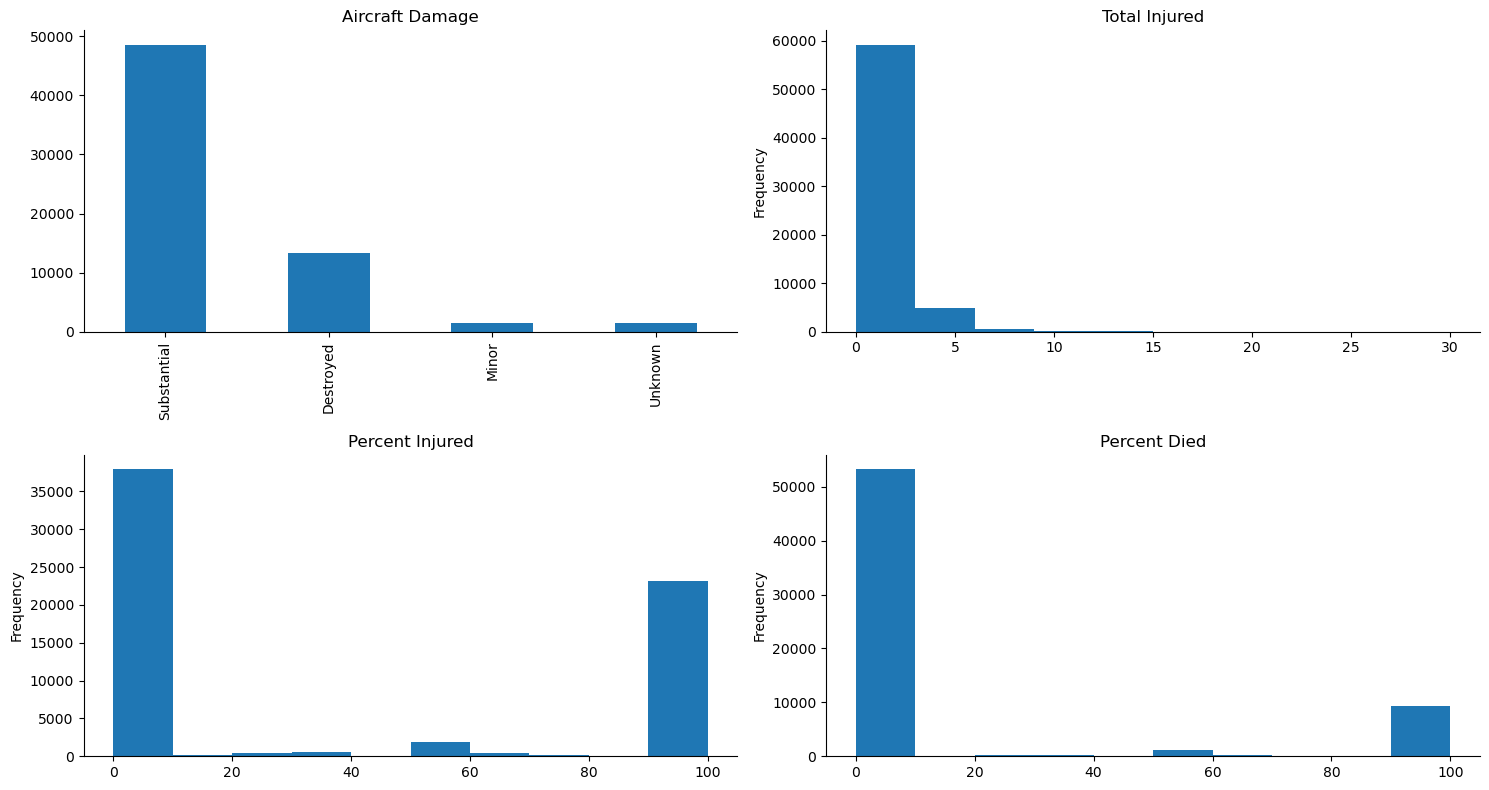

In [4]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [5]:
#popular_makes = df['Make'].value_counts()
#popular_makes = list(popular_makes[popular_makes > 100].index)
popular_makes = list(df['Make'].value_counts().index)

print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Bell', 'Boeing', 'Mooney', 'Grumman', 'Bellanca', 'Hughes', 'Air Tractor', 'Aeronca', 'Schweizer', 'Maule', 'Mcdonnel Douglas', 'Champion', 'Stinson', 'Cirrus', 'Luscombe', 'Aero Commander', 'Taylorcraft', 'De Havilland', 'North American', 'Aerospatiale', 'Hiller', 'Rockwell', 'Airbus', 'Enstrom', 'Grumman American', 'Ayres', 'Embraer', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Fairchild', 'Lake', 'Waco', 'Mitsubishi', 'Aviat', 'Bombardier', 'GrummanSchweizer', 'Socata', 'Ryan', 'Helio', 'Learjet', 'Schleicher', 'Dehavilland', 'Globe', 'Weatherly', 'Wsk Pzl Mielec', 'Lockheed']


## Damage Index

In [6]:
# Assign randomized values to unknown damaged indices based on percentage in dataset
unk_indices = list(df.loc[df['Aircraft.damage'] == 'Unknown'].index)

damage_probs = df['Aircraft.damage'].value_counts()
damage_probs = damage_probs.drop('Unknown')
damage_probs = damage_probs / damage_probs.sum()
rand_damage = np.random.choice(list(damage_probs.index), size = len(unk_indices), p = list(damage_probs))

adj_df = df.copy()
adj_df['Aircraft.damage'].iloc[unk_indices] = rand_damage

In [7]:
pop_means_df = adj_df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Make_Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = adj_df[adj_df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = adj_df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    
    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [8]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Make_Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index')

Damage_Index  Make_Num_Incidents  Uninjured_P  \
Boeing                           2.069733              1348.0    77.379048   
Cessna                           2.357917             26101.0    64.282062   
Piper                            2.438515             14353.0    58.750565   
Bellanca                         2.444336              1024.0    55.102539   
Bell                             2.481159              2415.0    52.612850   
Grumman                          2.502176              1149.0    66.232287   
Air Tractor                      2.345708               862.0    59.416087   
Hughes                           2.385747               884.0    57.882730   
Mooney                           2.534003              1294.0    48.377125   
Beech                            2.548546              5088.0    54.217529   
Maule                            2.191304               575.0    76.188406   
Aeronca                          2.277778               630.0    58.134921   
Mcdonnel Douglas                 2.181481               540.0    73.004829   
Schweizer                        2.286942               582.0    64.576174   
Champion                         2.305389               501.0    59.381238   
Airbus                           2.022152               316.0    70.359984   
Stinson                          2.263761               436.0    64.908257   
Luscombe                         2.245700               407.0    62.203112   
Taylorcraft                      2.247340               376.0    51.241135   
De Havilland                     2.292225               373.0    67.259694   
Cirrus                           2.386861               411.0    50.048662   
Hiller                           2.339233               339.0    62.881023   
Enstrom                          2.274306               288.0    68.026620   
Aerospatiale                     2.512397               363.0    53.723016   
Aero Commander                   2.641791               402.0    50.899668   
North American                   2.569106               369.0    53.048780   
Embraer                          2.123711               194.0    77.153504   
Bombardier                       2.000000               135.0    84.815479   
Rockwell                         2.615385               338.0    56.928008   
Swearingen                       2.168750               160.0    79.431314   
Waco                             2.121429               140.0    72.619048   
Aviat                            2.152174               138.0    68.236715   
Fairchild                        2.204225               142.0    68.702885   
Dehavilland                      2.040000               100.0    69.416667   
Ayres                            2.552036               221.0    60.859729   
Grumman American                 2.657658               222.0    44.256757   
Helio                            2.231481               108.0    83.010662   
Lake                             2.387324               142.0    56.220657   
Sikorsky                         2.529762               168.0    51.603364   
Schleicher                       2.267327               101.0    48.514851   
Ercoupe Eng & Research Corp      2.531646               158.0    52.531646   
Globe                            2.308511                94.0    54.432624   
Ryan                             2.418182               110.0    45.606061   
GrummanSchweizer                 2.503937               127.0    67.716535   
Socata                           2.504505               111.0    45.720721   
Weatherly                        2.404494                89.0    65.168539   
Mitsubishi                       2.789855               138.0    51.455314   
Learjet                          2.625000               104.0    64.342949   
Wsk Pzl Mielec                   2.590909                88.0    52.840909   
Lockheed                         3.074074                27.0    38.888889   

                             Injured_P     Died_P 

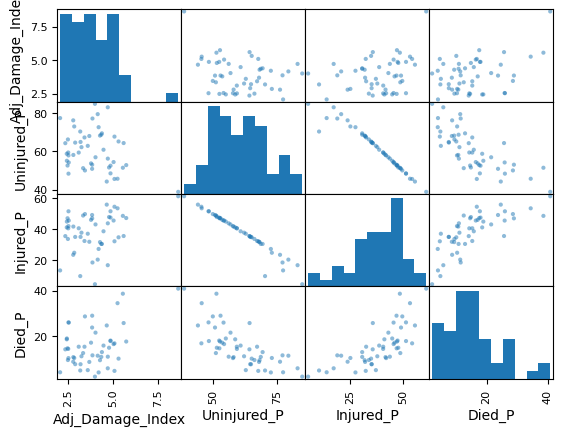

In [9]:
pd.plotting.scatter_matrix(di_df[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

In [10]:
di_df = di_df.sort_values(by = 'Adj_Damage_Index')
di_df

Damage_Index  Make_Num_Incidents  Uninjured_P  \
Boeing                           2.069733              1348.0    77.379048   
Cessna                           2.357917             26101.0    64.282062   
Piper                            2.438515             14353.0    58.750565   
Bellanca                         2.444336              1024.0    55.102539   
Bell                             2.481159              2415.0    52.612850   
Grumman                          2.502176              1149.0    66.232287   
Air Tractor                      2.345708               862.0    59.416087   
Hughes                           2.385747               884.0    57.882730   
Mooney                           2.534003              1294.0    48.377125   
Beech                            2.548546              5088.0    54.217529   
Maule                            2.191304               575.0    76.188406   
Aeronca                          2.277778               630.0    58.134921   
Mcdonnel Douglas                 2.181481               540.0    73.004829   
Schweizer                        2.286942               582.0    64.576174   
Champion                         2.305389               501.0    59.381238   
Airbus                           2.022152               316.0    70.359984   
Stinson                          2.263761               436.0    64.908257   
Luscombe                         2.245700               407.0    62.203112   
Taylorcraft                      2.247340               376.0    51.241135   
De Havilland                     2.292225               373.0    67.259694   
Cirrus                           2.386861               411.0    50.048662   
Hiller                           2.339233               339.0    62.881023   
Enstrom                          2.274306               288.0    68.026620   
Aerospatiale                     2.512397               363.0    53.723016   
Aero Commander                   2.641791               402.0    50.899668   
North American                   2.569106               369.0    53.048780   
Embraer                          2.123711               194.0    77.153504   
Bombardier                       2.000000               135.0    84.815479   
Rockwell                         2.615385               338.0    56.928008   
Swearingen                       2.168750               160.0    79.431314   
Waco                             2.121429               140.0    72.619048   
Aviat                            2.152174               138.0    68.236715   
Fairchild                        2.204225               142.0    68.702885   
Dehavilland                      2.040000               100.0    69.416667   
Ayres                            2.552036               221.0    60.859729   
Grumman American                 2.657658               222.0    44.256757   
Helio                            2.231481               108.0    83.010662   
Lake                             2.387324               142.0    56.220657   
Sikorsky                         2.529762               168.0    51.603364   
Schleicher                       2.267327               101.0    48.514851   
Ercoupe Eng & Research Corp      2.531646               158.0    52.531646   
Globe                            2.308511                94.0    54.432624   
Ryan                             2.418182               110.0    45.606061   
GrummanSchweizer                 2.503937               127.0    67.716535   
Socata                           2.504505               111.0    45.720721   
Weatherly                        2.404494                89.0    65.168539   
Mitsubishi                       2.789855               138.0    51.455314   
Learjet                          2.625000               104.0    64.342949   
Wsk Pzl Mielec                   2.590909                88.0    52.840909   
Lockheed                         3.074074                27.0    38.888889   

                             Injured_P     Died_P 

In [11]:
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Percent.Injured'] == 0) & (df['Total.Passengers'] != 0)]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]

In [12]:
d_d = best_dest['Model'].value_counts().to_dict()
d_s = best_subs['Model'].value_counts().to_dict()
d_m = best_minor['Model'].value_counts().to_dict()
all_keys = set()
all_keys.update(d_d.keys())
all_keys.update(d_s.keys())
all_keys.update(d_m.keys())
r_d  = {}
for key in all_keys:
    r_d[key] = d_d.get(key, 0) + d_s.get(key, 0) + d_m.get(key, 0)
result_d = {}
for key in all_keys:
    denominator = df['Model'].value_counts().to_dict().get(key, 1)
       
    if denominator != 0:
        result_d[key] = r_d[key] / denominator
    else:
        result_d[key] = 0 

In [13]:
model_performance = pd.Series(result_d)

model_performance

P210R               0.222222
Be-18               0.333333
T50-A17             1.000000
B-99                0.750000
Dh-82C Tigermoth    1.000000
                      ...   
S-55-Qt             1.000000
L-3B                0.500000
At-602              0.760000
Pt-13B              1.000000
301-300             1.000000
Length: 3122, dtype: float64

In [14]:
model_vc = df['Model'].value_counts()

In [15]:
model_performance.isna().sum()

0

In [16]:
model_pwdc = pd.concat({'Performance':model_performance, 'Amount of incidents':model_vc}, axis=1)
model_pwdc.sort_values(by='Amount of incidents',ascending=False)

Performance  Amount of incidents
152            0.468723                 2334
172            0.593128                 1659
172N           0.561788                 1141
Pa-28-140      0.473106                  911
150            0.463263                  803
...                 ...                  ...
65C            1.000000                    1
Gc-1-A         1.000000                    1
H 395          1.000000                    1
H-19-Uh19D     1.000000                    1
J3C65               NaN                    1

[4738 rows x 2 columns]

In [17]:
model_pwdc = model_pwdc.fillna(0)
#model_pwdc = model_pwdc.loc[model_pwdc['Amount of incidents'] >= 20]
model_pwdc.sort_values(by='Performance')

Performance  Amount of incidents
J3C65                   0.0                    1
Pa-46-31P               0.0                    1
Erj 170-20              0.0                    1
Erj 170-100 Se          0.0                    1
Pa46 - 350P             0.0                    1
...                     ...                  ...
Jr.Sr.                  1.0                    1
Uh-12L4                 1.0                    1
Gs-2F                   1.0                    1
Be24                    1.0                    1
B17-30A                 1.0                    1

[4738 rows x 2 columns]

In [18]:
di_df

Damage_Index  Make_Num_Incidents  Uninjured_P  \
Boeing                           2.069733              1348.0    77.379048   
Cessna                           2.357917             26101.0    64.282062   
Piper                            2.438515             14353.0    58.750565   
Bellanca                         2.444336              1024.0    55.102539   
Bell                             2.481159              2415.0    52.612850   
Grumman                          2.502176              1149.0    66.232287   
Air Tractor                      2.345708               862.0    59.416087   
Hughes                           2.385747               884.0    57.882730   
Mooney                           2.534003              1294.0    48.377125   
Beech                            2.548546              5088.0    54.217529   
Maule                            2.191304               575.0    76.188406   
Aeronca                          2.277778               630.0    58.134921   
Mcdonnel Douglas                 2.181481               540.0    73.004829   
Schweizer                        2.286942               582.0    64.576174   
Champion                         2.305389               501.0    59.381238   
Airbus                           2.022152               316.0    70.359984   
Stinson                          2.263761               436.0    64.908257   
Luscombe                         2.245700               407.0    62.203112   
Taylorcraft                      2.247340               376.0    51.241135   
De Havilland                     2.292225               373.0    67.259694   
Cirrus                           2.386861               411.0    50.048662   
Hiller                           2.339233               339.0    62.881023   
Enstrom                          2.274306               288.0    68.026620   
Aerospatiale                     2.512397               363.0    53.723016   
Aero Commander                   2.641791               402.0    50.899668   
North American                   2.569106               369.0    53.048780   
Embraer                          2.123711               194.0    77.153504   
Bombardier                       2.000000               135.0    84.815479   
Rockwell                         2.615385               338.0    56.928008   
Swearingen                       2.168750               160.0    79.431314   
Waco                             2.121429               140.0    72.619048   
Aviat                            2.152174               138.0    68.236715   
Fairchild                        2.204225               142.0    68.702885   
Dehavilland                      2.040000               100.0    69.416667   
Ayres                            2.552036               221.0    60.859729   
Grumman American                 2.657658               222.0    44.256757   
Helio                            2.231481               108.0    83.010662   
Lake                             2.387324               142.0    56.220657   
Sikorsky                         2.529762               168.0    51.603364   
Schleicher                       2.267327               101.0    48.514851   
Ercoupe Eng & Research Corp      2.531646               158.0    52.531646   
Globe                            2.308511                94.0    54.432624   
Ryan                             2.418182               110.0    45.606061   
GrummanSchweizer                 2.503937               127.0    67.716535   
Socata                           2.504505               111.0    45.720721   
Weatherly                        2.404494                89.0    65.168539   
Mitsubishi                       2.789855               138.0    51.455314   
Learjet                          2.625000               104.0    64.342949   
Wsk Pzl Mielec                   2.590909                88.0    52.840909   
Lockheed                         3.074074                27.0    38.888889   

                             Injured_P     Died_P 

In [19]:
joint = df.join(model_pwdc, how='outer',on='Model')
joint2 = joint.join(di_df, how='outer', on='Make')
joint2

index                  Location          Country Aircraft.damage  \
0          0                        ID    United States       Destroyed   
1084    1084                        KY    United States     Substantial   
1438    1438                        WA    United States       Destroyed   
2767    2767                        WA    United States       Destroyed   
3985    3985                        WY    United States     Substantial   
...      ...                       ...              ...             ...   
60697  60697  Unknown/Foreign Location  Foreign Country           Minor   
61329  61329  Unknown/Foreign Location  Foreign Country           Minor   
63711  63711                        MI    United States       Destroyed   
64608  64608                        FL    United States     Substantial   
64760  64760                        IN    United States     Substantial   

          Make  Model  Number.of.Engines    Engine.Type Purpose.of.flight  \
0      Stinson  108-3                1.0  Reciprocating          Personal   
1084   Stinson  108-3                1.0  Reciprocating          Personal   
1438   Stinson  108-3                1.0  Reciprocating          Personal   
2767   Stinson  108-3                1.0  Reciprocating          Personal   
3985   Stinson  108-3                1.0  Reciprocating          Personal   
...        ...    ...                ...            ...               ...   
60697   Cirrus   Sf50                1.0      Turbo Fan             Ferry   
61329   Cirrus   Sf50                1.0      Turbo Jet           Unknown   
63711   Cirrus   Sf50                1.0        Unknown          Business   
64608   Cirrus   Sf50                1.0        Unknown          Business   
64760   Cirrus   Sf50                1.0        Unknown       Positioning   

       Total.Fatal.Injuries  ...  Event.Year  Performance  \
0                       2.0  ...        1948     0.649485   
1084                    0.0  ...        1982     0.649485   
1438                    0.0  ...        1982     0.649485   
2767                    2.0  ...        1982     0.649485   
3985                    0.0  ...        1983     0.649485   
...                     ...  ...         ...          ...   
60697                   0.0  ...        2018     1.000000   
61329                   0.0  ...        2018     1.000000   
63711                   0.0  ...        2021     1.000000   
64608                   0.0  ...        2022     1.000000   
64760                   0.0  ...        2022     1.000000   

       Amount of incidents Damage_Index  Make_Num_Incidents  Uninjured_P  \
0                       97     2.263761               436.0    64.908257   
1084                    97     2.263761               436.0    64.908257   
1438                    97     2.263761               436.0    64.908257   
2767                    97     2.263761               436.0    64.908257   
3985                    97     2.263761               436.0    64.908257   
...                    ...          ...                 ...          ...   
60697                    5     2.386861               411.0    50.048662   
61329                    5     2.386861               411.0    50.048662   
63711                    5     2.386861               411.0    50.048662   
64608                    5     2.386861               411.0    50.048662   
64760                    5     2.386861               411.0    50.048662   

       Injured_P     Died_P   Penalty Adj_Damage_Index  
0      35.091743   7.645260  1.415057         3.203350  
1084   35.091743   7.645260  1.415057         3.203350  
1438   35.091743   7.645260  1.415057         3.203350  
2767   35.091743   7.645260  1.415057         3.203350  
3985   35.091743   7.645260  1.415057         3.203350  
...          ...        ...       ...              ...  
60697  49.708029  28.629359  1.444581         3.448015  
61329  49.708029  28.629359  1.444581         3.448015  
63711  49.708029  28.6

In [20]:
di_df = di_df.reset_index()
di_df = di_df.rename(columns={'index': 'Make'})

In [22]:
di_df

Make  Damage_Index  Make_Num_Incidents  \
0                        Boeing      2.069733              1348.0   
1                        Cessna      2.357917             26101.0   
2                         Piper      2.438515             14353.0   
3                      Bellanca      2.444336              1024.0   
4                          Bell      2.481159              2415.0   
5                       Grumman      2.502176              1149.0   
6                   Air Tractor      2.345708               862.0   
7                        Hughes      2.385747               884.0   
8                        Mooney      2.534003              1294.0   
9                         Beech      2.548546              5088.0   
10                        Maule      2.191304               575.0   
11                      Aeronca      2.277778               630.0   
12             Mcdonnel Douglas      2.181481               540.0   
13                    Schweizer      2.286942               582.0   
14                     Champion      2.305389               501.0   
15                       Airbus      2.022152               316.0   
16                      Stinson      2.263761               436.0   
17                     Luscombe      2.245700               407.0   
18                  Taylorcraft      2.247340               376.0   
19                 De Havilland      2.292225               373.0   
20                       Cirrus      2.386861               411.0   
21                       Hiller      2.339233               339.0   
22                      Enstrom      2.274306               288.0   
23                 Aerospatiale      2.512397               363.0   
24               Aero Commander      2.641791               402.0   
25               North American      2.569106               369.0   
26                      Embraer      2.123711               194.0   
27                   Bombardier      2.000000               135.0   
28                     Rockwell      2.615385               338.0   
29                   Swearingen      2.168750               160.0   
30                         Waco      2.121429               140.0   
31                        Aviat      2.152174               138.0   
32                    Fairchild      2.204225               142.0   
33                  Dehavilland      2.040000               100.0   
34                        Ayres      2.552036               221.0   
35             Grumman American      2.657658               222.0   
36                        Helio      2.231481               108.0   
37                         Lake      2.387324               142.0   
38                     Sikorsky      2.529762               168.0   
39                   Schleicher      2.267327               101.0   
40  Ercoupe Eng & Research Corp      2.531646               158.0   
41                        Globe      2.308511                94.0   
42                         Ryan      2.418182               110.0   
43             GrummanSchweizer      2.503937               127.0   
44                       Socata      2.504505               111.0   
45                    Weatherly      2.404494                89.0   
46                   Mitsubishi      2.789855               138.0   
47                      Learjet      2.625000               104.0   
48               Wsk Pzl Mielec      2.590909                88.0   
49                     Lockheed      3.074074                27.0   

    Uninjured_P  Injured_P     Died_P   Penalty  Adj_Damage_Index  
0     77.379048  13.644691   4.119794  1.000000          2.069733  
1     64.282062  35.599169  14.184457  1.000000          2.357917  
2     58.750565  41.165828  18.580916  1.000000          2.438515  
3     55.102539  44.897461  18.953451  1.000000          2.444336  
4     52.612850  47.014479  14.632809  1.000000          2.481159  
5     66.232287  33.767713   9.495173  1.000000          2.502176  
6     59.416087  40.583913  14.

In [21]:
joint.to_csv('priv_analyzed.csv')
di_df.to_csv('damage_indices.csv')